In [1]:
import pandas as pd # Reading datasets
import numpy as np # Operations on our dataset
import matplotlib.pyplot as plt # Visualization library
import seaborn as sns #E nhanced visualization library
from sklearn.preprocessing import LabelEncoder, StandardScaler # Normalizing and Categorical Handeling
from sklearn.linear_model import LinearRegression


import warnings


warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"F:\Courses\Data Science bootcamp\AirBnB\AirBNB.csv")
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


After inputting the dataset, I need to understand what the columns describe and what type they are. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


Here I will take care of every categorical value, so that I need only worry about numbers

In [4]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [5]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,0,3.0,1.0,2,1,0,100.0,1.0,1.0,5.010635
1,6304928,0,7.0,1.0,2,1,1,93.0,3.0,3.0,5.129899
2,7919400,0,5.0,1.0,1,1,1,92.0,1.0,3.0,4.976734
3,13418779,0,4.0,1.0,0,1,0,NaN,2.0,2.0,6.620073
4,3808709,0,2.0,1.0,1,1,1,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  int32  
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74111 non-null  int32  
 5   cleaning_fee          74111 non-null  int32  
 6   instant_bookable      74111 non-null  int32  
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 5.1 MB


Now that the categorival variables are taken care of, I need to handle Null values.

In [7]:
df.isnull().sum()

id                          0
room_type                   0
accommodates                3
bathrooms                 203
cancellation_policy         0
cleaning_fee                0
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [8]:
df["review_scores_rating"].fillna(df["review_scores_rating"].mean(), inplace = True)
df["beds"].fillna(df["beds"].mean(), inplace = True)
df["accommodates"].fillna(df["accommodates"].mean(), inplace = True)

For the number of bathroom and bedrooms in each house, I decided to look at the room type, instead of the Mean value as it seems more logical. The answer turned out to be the same Though. 

In [9]:
s1 = s2 = s3 = 0
for irow in range(df.shape[0]):
    if df.iloc[irow]["room_type"] == 0:
        if pd.isna(df.at[irow,"bedrooms"]):
            continue
        s1 = s1 + df.iloc[irow]["bedrooms"]
    elif df.iloc[irow]["room_type"] == 1:
        if pd.isna(df.at[irow,"bedrooms"]):
            continue
        s2 = s2 + df.iloc[irow]["bedrooms"]
    else:
        if pd.isna(df.at[irow,"bedrooms"]):
            continue
        s3 = s3 + df.iloc[irow]["bedrooms"]

bedrooms_mean = []
bedrooms_mean.append(int(s1 / df.room_type.value_counts()[0]))
bedrooms_mean.append(int(s2 / df.room_type.value_counts()[1]))
bedrooms_mean.append(int(s3 / df.room_type.value_counts()[2]))

# the mean for each one is 1
df["bedrooms"].fillna(1, inplace = True)

In [10]:
s1 = s2 = s3 = 0
for irow in range(df.shape[0]):
    if df.iloc[irow]["room_type"] == 0:
        if pd.isna(df.at[irow,"bathrooms"]):
            continue
        s1 = s1 + df.iloc[irow]["bathrooms"]
    elif df.iloc[irow]["room_type"] == 1:
        if pd.isna(df.at[irow,"bathrooms"]):
            continue
        s2 = s2 + df.iloc[irow]["bathrooms"]
    else:
        if pd.isna(df.at[irow,"bathrooms"]):
            continue
        s3 = s3 + df.iloc[irow]["bathrooms"]

bathroom_mean = []
bathroom_mean.append(int(s1 / df.room_type.value_counts()[0]))
bathroom_mean.append(int(s2 / df.room_type.value_counts()[1]))
bathroom_mean.append(int(s3 / df.room_type.value_counts()[2]))

# the mean for each one is 1
df["bathrooms"].fillna(1, inplace = True)

In [11]:
df.describe()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,0.471941,3.155125,1.234628,1.134568,0.734129,0.262458,94.067365,1.265467,1.710868,4.782069
std,6.081735e+06,0.554972,2.153559,0.581386,0.851495,0.441921,0.439973,6.896002,0.851671,1.253033,0.717394
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,93.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,94.067365,1.000000,1.000000,4.709530
75%,1.640226e+07,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,2.123090e+07,3.000000,16.000000,8.000000,3.000000,2.000000,1.000000,100.000000,10.000000,18.000000,7.600402


In [12]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,0,3.0,1.0,2,1,0,100.000000,1.0,1.0,5.010635
1,6304928,0,7.0,1.0,2,1,1,93.000000,3.0,3.0,5.129899
2,7919400,0,5.0,1.0,1,1,1,92.000000,1.0,3.0,4.976734
3,13418779,0,4.0,1.0,0,1,0,94.067365,2.0,2.0,6.620073
4,3808709,0,2.0,1.0,1,1,1,40.000000,0.0,1.0,4.744932


As evident below, the relationships are linear, therefore linear regression model is recommended.

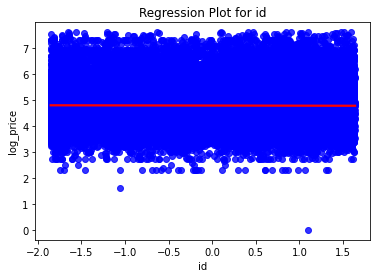

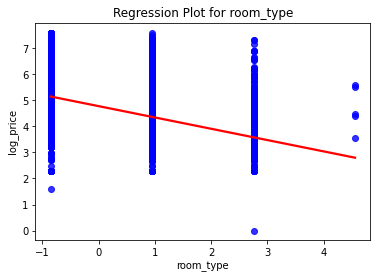

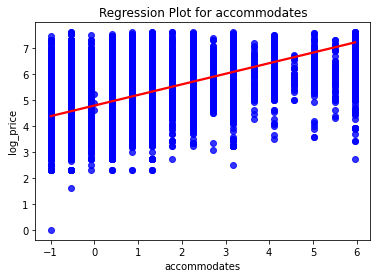

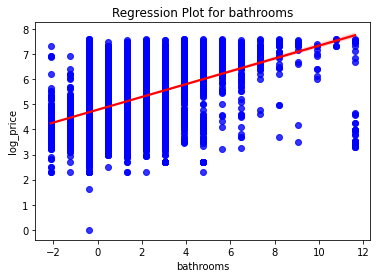

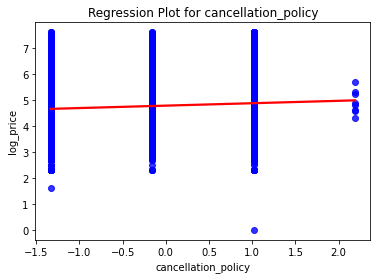

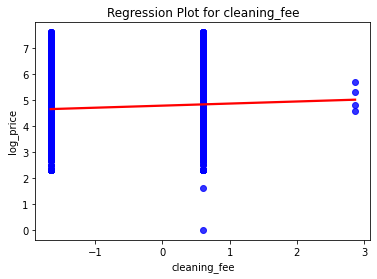

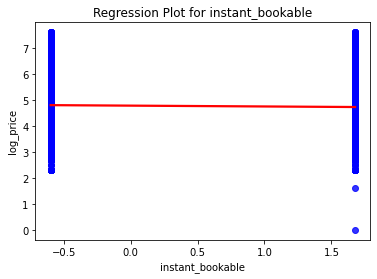

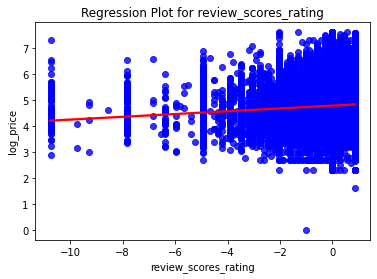

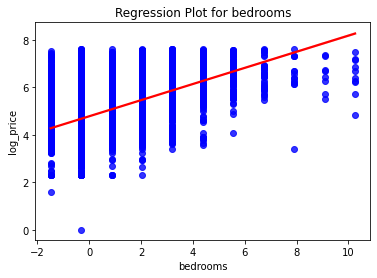

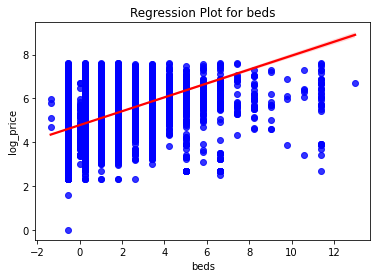

In [13]:
# Create scatter plots

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('log_price', axis=1))

for i, var in enumerate(df.drop('log_price', axis=1).columns):
    sns.regplot(x=X_scaled[:, i], y=df['log_price'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.xlabel(var)
    plt.ylabel('log_price')
    plt.title(f'Regression Plot for {var}')
    plt.show()

In [14]:
df.describe()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,0.471941,3.155125,1.234628,1.134568,0.734129,0.262458,94.067365,1.265467,1.710868,4.782069
std,6.081735e+06,0.554972,2.153559,0.581386,0.851495,0.441921,0.439973,6.896002,0.851671,1.253033,0.717394
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,93.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,94.067365,1.000000,1.000000,4.709530
75%,1.640226e+07,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,2.123090e+07,3.000000,16.000000,8.000000,3.000000,2.000000,1.000000,100.000000,10.000000,18.000000,7.600402


The Chart Below also confirm the Linear Relationship

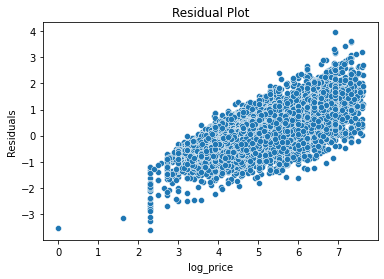

In [15]:

# Fit a linear regression model
model = LinearRegression()

y = df["log_price"]  # Dependent variable
X = df.drop(columns = {"log_price"})  # Independent variable(s)

model.fit(X, y)

# Calculate the residuals
residuals = y - model.predict(X)

# Plot the residuals against the independent variable 'log_price'
sns.scatterplot(x=df['log_price'], y=residuals)
plt.xlabel('log_price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The Correlation values also suggest that log price has a linear realtionship with almost all of the others.

In [16]:
independent_vars = ['room_type', 'accommodates', 'bathrooms', 'cancellation_policy', 'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms','beds']
      
# Calculate the correlation coefficient for each independent variable
for var in independent_vars:
    correlation_coefficient = df['log_price'].corr(df[var])
    print(f"Correlation Coefficient between log_price and {var}: {correlation_coefficient}")

Correlation Coefficient between log_price and room_type: -0.6067258864888377
Correlation Coefficient between log_price and accommodates: 0.5675787043725142
Correlation Coefficient between log_price and bathrooms: 0.35517427197005236
Correlation Coefficient between log_price and cancellation_policy: 0.1293088461670347
Correlation Coefficient between log_price and cleaning_fee: 0.11122001958726674
Correlation Coefficient between log_price and instant_bookable: -0.044271280444865876
Correlation Coefficient between log_price and review_scores_rating: 0.07482200388146272
Correlation Coefficient between log_price and bedrooms: 0.47302754048181994
Correlation Coefficient between log_price and beds: 0.4417666935353896


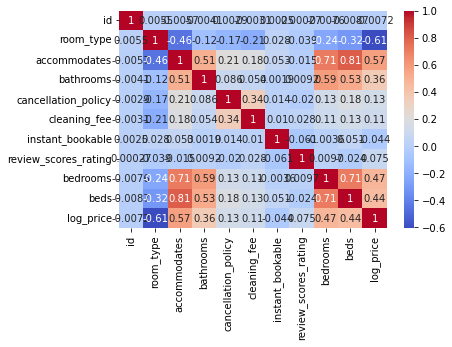

In [17]:
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()